In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sys
from pathlib import Path
sys.path.insert(0, "..")
from src.plot_util import plot_U_V, plot_graded_overlapping_patches_df, plot_by_store_memberships, plot_by_item_memberships, plot_store_sku_heatmap   


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = "../output/data/top_gc_median_df_model.pickle"
d = pickle.load(open(path, "rb"))
d

{'U': array([[1, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1]], dtype=int8),
 'V': array([[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0]], dtype=int8),
 'B': array([[ 0.22423763,  0.0765989 ,  0.2670559 ,  0.14526592, -0.03965751,
          0.0601037 ],
        [ 0.25094033,  0.08406527,  0.19198848,  0.20102772,  0.22761201,
          0.12043506],
        [ 0.06653124,  0.08382656,  0.09359558,  0.18832404, -0.05184532,
          0.14608922],
        [-0.09831796,  0.13959467,  0.07228307,  0.08720251,  0.0144913 ,
          0.15990381],
        [

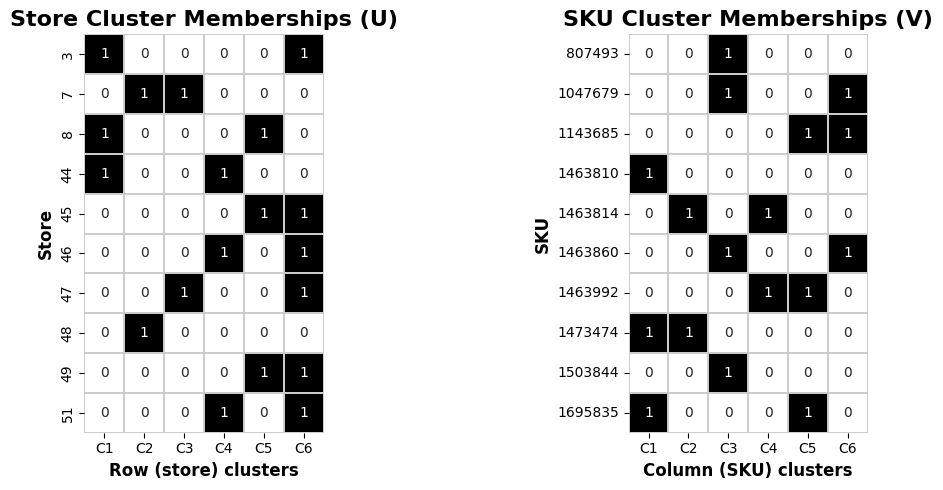

In [14]:
fn = Path("../output/figures/20251017_top_10_store_sku_U_V.tiff")
plot_U_V(
    d["U"], d["V"],
    d["row_names"],
    d["col_labels"],
    fn=fn,
)

In [4]:
X = pd.read_parquet("../output/data/top_gc_median_df.parquet")
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,-0.100664,0.061644,-0.054486,-0.043037,-0.021405,-0.044905,0.013871,-0.000522,0.046514,0.003983
7,-0.109314,0.115150,0.045455,-0.045125,-0.031803,-0.054234,0.233440,-0.041476,-0.021727,-0.103444
8,0.018115,0.038688,-0.166921,-0.068142,-0.028743,0.033899,0.086899,-0.095203,-0.024563,-0.049717
44,-0.030781,-0.063654,-0.187821,-0.074568,-0.056228,0.081623,-0.060834,-0.069083,-0.028527,-0.168521
45,-0.088983,-0.233874,-0.083122,-0.087904,-0.043332,0.000011,-0.024241,-0.061894,-0.015947,0.030688
46,-0.271890,-0.028522,-0.070456,-0.116117,-0.042809,-0.051641,0.005644,-0.058991,0.062415,-0.140928
47,-0.088254,0.097213,-0.155522,-0.040284,-0.014005,-0.012556,-0.059407,-0.024887,-0.014068,-0.071948
48,-0.113193,0.001798,-0.179010,-0.080971,-0.096480,0.060771,-0.019310,-0.023916,0.023689,-0.064514
49,-0.180963,0.017268,-0.090216,-0.042243,-0.056762,0.106379,0.004434,-0.081315,-0.023470,0.026916


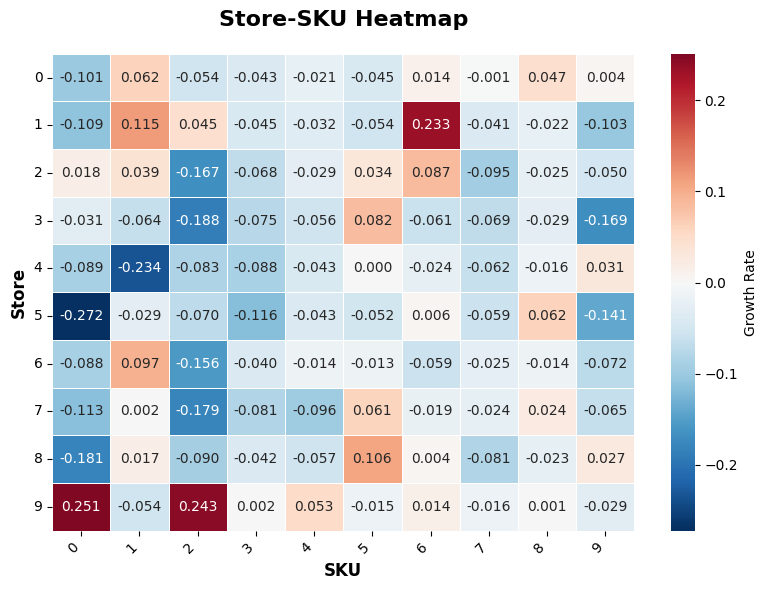

In [5]:
plot_store_sku_heatmap(X)

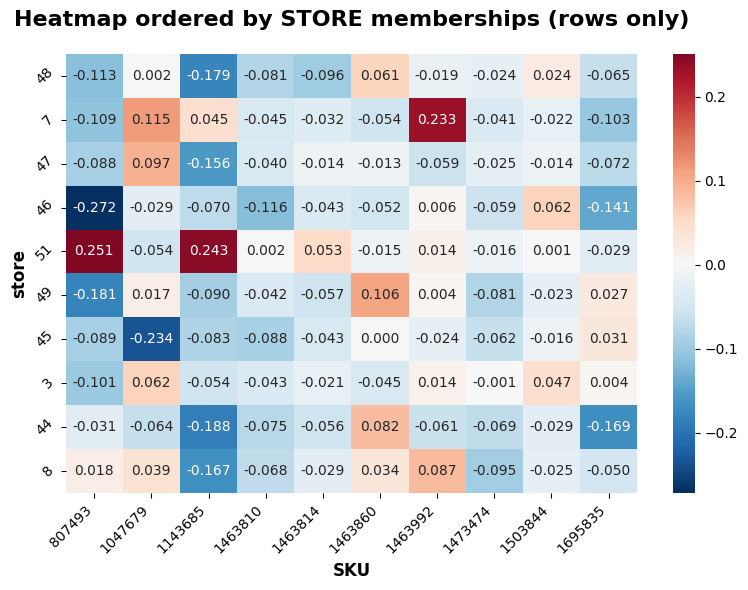

In [16]:
# 1) Reorder by stores only (U); keep columns as-is
fn = Path("../output/figures/20251017_heatmap_top_10_store_item_item_clusters_matrix.png")
plot_by_store_memberships(X, d["U"], show_values=True, value_fmt=".3f", fn=fn)



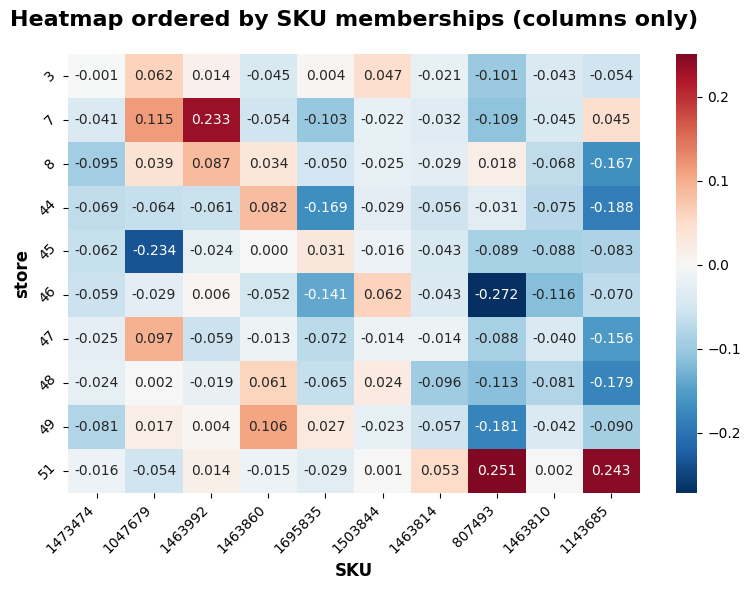

In [17]:
fn = Path("../output/figures/20251017_heatmap_top_10_store_item_item_clusters_matrix.png")
plot_by_item_memberships(X, d["U"], show_values=True, value_fmt=".3f", fn=fn)


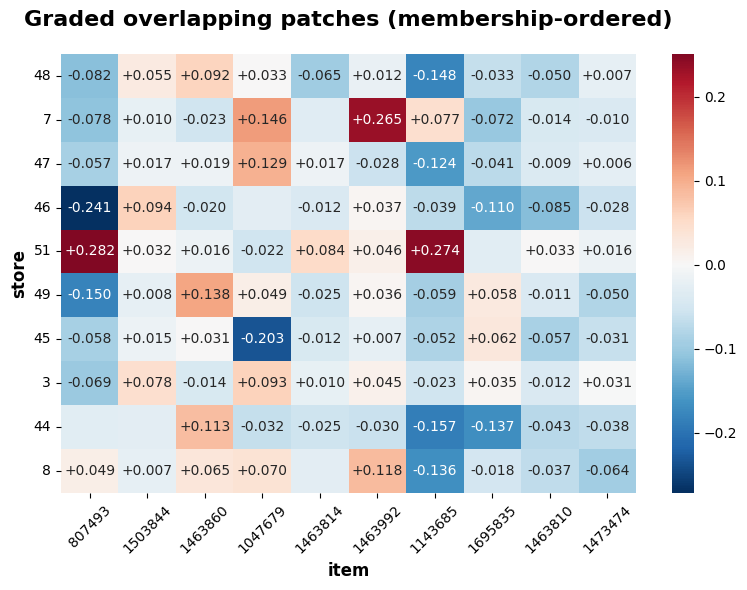

In [8]:
fn = Path("../output/figures/20251020_heatmap_top_10_store_item_graded_clusters_matrix.png")
plot_graded_overlapping_patches_df(
    X, d["U"], d["V"],
    cmap="RdBu_r",
    annotate="abs",
    min_abs=0.005,
    fn=fn,
)